## Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Define image size

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

## Load Datasets

In [5]:
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.


2022-09-29 04:52:57.719542: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [6]:
class_names = training_dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [7]:
len(training_dataset)

102

## Plot Sample of images

2022-09-29 04:36:07.384664: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


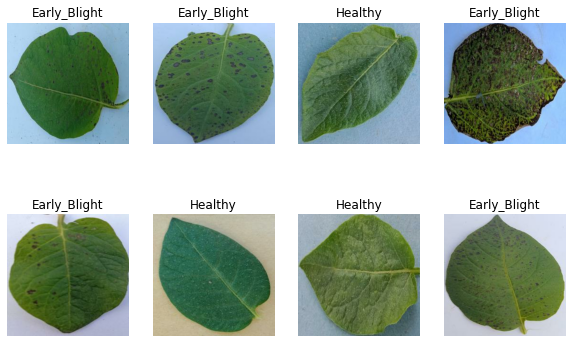

In [6]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in training_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#### Shuffle and prefetch the images

In [8]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Build the model

In [9]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [11]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history=model.fit(
    training_dataset,
    epochs=20,
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)

Epoch 1/20


2022-09-29 04:53:12.613345: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


102/102 [==============================] - 140s 1s/step - loss: 0.9964 - accuracy: 0.5023 - val_loss: 0.8561 - val_accuracy: 0.5793
Epoch 2/20
102/102 [==============================] - 137s 1s/step - loss: 0.8770 - accuracy: 0.6035 - val_loss: 0.7527 - val_accuracy: 0.7236
Epoch 3/20
102/102 [==============================] - 136s 1s/step - loss: 0.6489 - accuracy: 0.7508 - val_loss: 0.4610 - val_accuracy: 0.8053
Epoch 4/20
102/102 [==============================] - 136s 1s/step - loss: 0.4060 - accuracy: 0.8490 - val_loss: 0.3754 - val_accuracy: 0.8582
Epoch 5/20
102/102 [==============================] - 136s 1s/step - loss: 0.3515 - accuracy: 0.8702 - val_loss: 0.4720 - val_accuracy: 0.8197
Epoch 6/20
102/102 [==============================] - 135s 1s/step - loss: 0.2815 - accuracy: 0.9003 - val_loss: 0.2900 - val_accuracy: 0.8990
Epoch 7/20
102/102 [==============================] - 136s 1s/step - loss: 0.2230 - accuracy: 0.9219 - val_loss: 0.1920 - val_accuracy: 0.9351
Epoch 8/20

In [15]:
model.evaluate(test_data)

13/13 [==============================] - 4s 281ms/step - loss: 0.0852 - accuracy: 0.9679


[0.08516482263803482, 0.9679012298583984]

In [19]:
test = test_datagen.flow_from_directory('../input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_1.jpg', 
                                            target_size =(img_width, img_height), 
                                            batch_size = 128, class_mode ='categorical',color_mode='rgb', #grayscale
                                            shuffle=False) 

NameError: name 'test_datagen' is not defined

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   '../input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

p=model.predict(dataset)

Found 405 files belonging to 3 classes.


In [25]:
p[10]

array([9.7597135e-15, 9.9282141e-28, 1.0000000e+00], dtype=float32)

The Image Title :  Healthy
Model Predicted label :  Healthy


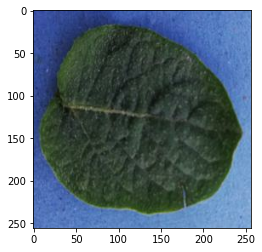

In [16]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[0])])

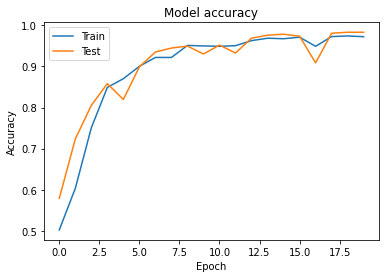

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=class_names

Y_pred = model.predict(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

NameError: name 'eval_generator' is not defined

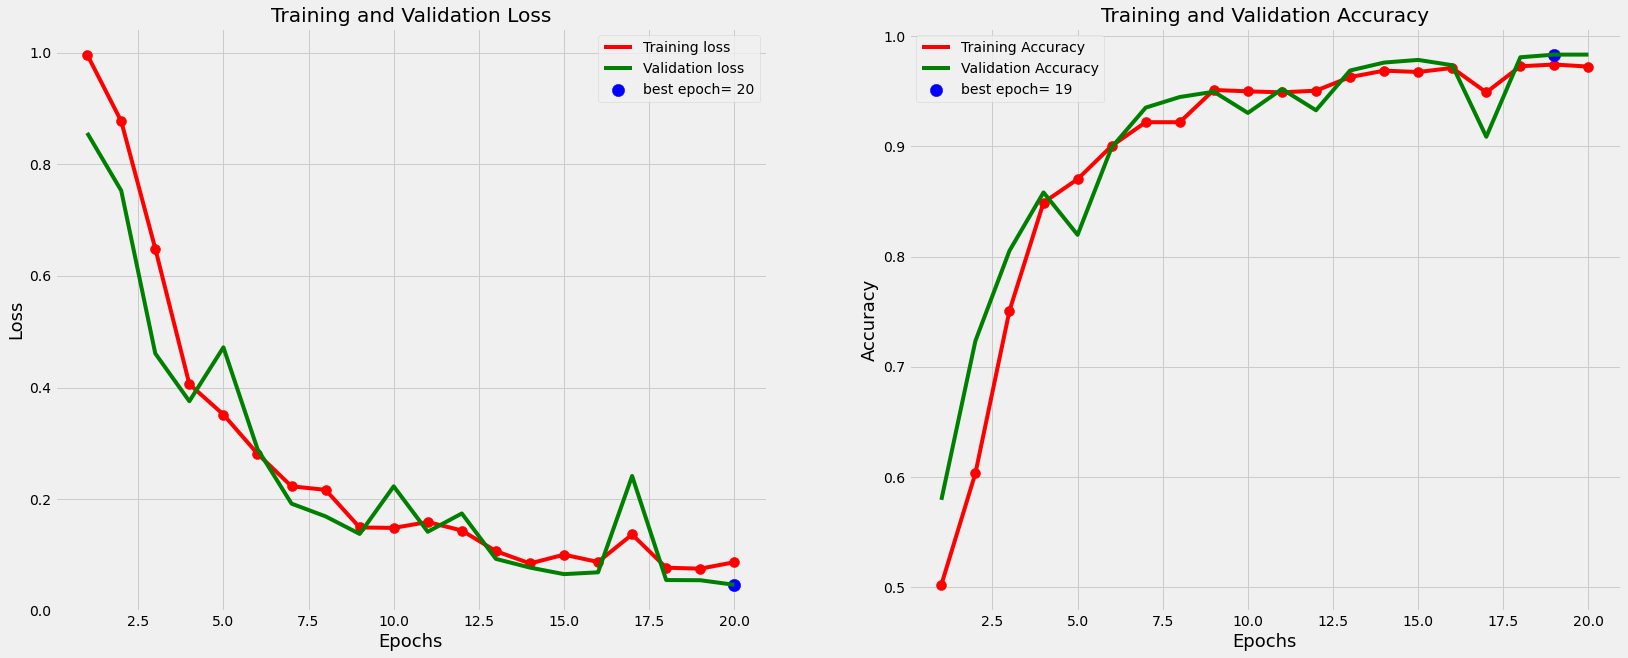

In [27]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    return index_loss
    
loss_index=tr_plot(history,0)

In [28]:
history.history

{'loss': [0.9964343309402466,
  0.8770436644554138,
  0.6488665342330933,
  0.4060441255569458,
  0.35151901841163635,
  0.2814662754535675,
  0.22299250960350037,
  0.21668633818626404,
  0.1493053436279297,
  0.14848950505256653,
  0.1590646207332611,
  0.14381392300128937,
  0.1069091409444809,
  0.08480532467365265,
  0.10052374750375748,
  0.08747702836990356,
  0.13670939207077026,
  0.0772031918168068,
  0.07544272392988205,
  0.08702258765697479],
 'accuracy': [0.5023069977760315,
  0.6035066246986389,
  0.7508459091186523,
  0.8489695191383362,
  0.8701937794685364,
  0.900338351726532,
  0.9218701720237732,
  0.9218701720237732,
  0.9510919451713562,
  0.9498615860939026,
  0.94893878698349,
  0.9504767656326294,
  0.9627806544303894,
  0.968625009059906,
  0.9673946499824524,
  0.9710858464241028,
  0.94893878698349,
  0.9726238250732422,
  0.9741618037223816,
  0.9723162055015564],
 'val_loss': [0.8561118245124817,
  0.7527058720588684,
  0.4609677493572235,
  0.37543681263

In [30]:
model.save(r"C:working/model1.h5")

In [33]:
from tensorflow.keras.utils import load_img, img_to_array 


In [39]:
x = load_img(
"../input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing/Late_Blight/Late_Blight_10.jpg",
target_size = (IMAGE_SIZE,IMAGE_SIZE)
)
x=img_to_array(x)
x=x/255
x=x.reshape(1,IMAGE_SIZE,IMAGE_SIZE,3)

# print(test)
Y_pred = model.predict(x)


ValueError: Failed to find data adapter that can handle input: <class 'PIL.JpegImagePlugin.JpegImageFile'>, <class 'NoneType'>

In [37]:
Y_pred

array([[0.35168907, 0.3789052 , 0.26940578]], dtype=float32)